In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
data = pd.read_csv('data_set .csv')
labels = pd.read_csv('labels.csv', delimiter=';')
data = data.merge(labels, how='left', left_on='appsflyer_id', right_on='Appsflyer_id')
data['is_fraud'] = ~data['Fraud_reasons'].isnull()
data['install_time'] = pd.to_datetime(data['install_time'])
data['install_time_of_day'] = pd.to_datetime(data['install_time'])
data['attributed_touch_time'] = pd.to_datetime(data['attributed_touch_time'])
data['sec_touch_install'] = (pd.to_datetime(data['install_time']) 
                             - pd.to_datetime(data['attributed_touch_time'])).dt.total_seconds()

In [132]:
data['install_time_since_midnight_sec'] = (data['install_time'] - 
                                           pd.to_datetime(data['install_time'].dt.date)) / np.timedelta64(1, 's')

In [3]:
data.head()

,site_id,appsflyer_id,publisher,sub_site_id,date,app_id,app_version,attributed_touch_time,attributed_touch_type,operator,...,language,os_version,sdk_version,wifi,Appsflyer_id,App_id,Publisher (media_source),Site_id,Fraud_reasons,is_fraud
0,0,148552020,AA,0,2017-10-17,id966165025,3006005000,2017-10-17 21:20:31,click,NaN,...,en-GB,10.3.3,v4.8.0,0,NaN,NaN,NaN,NaN,NaN,False
1,2588,6912501,AA,1133,2017-10-08,ng.jiji.app,3004002000,2017-10-08 17:46:52,click,MTN NG,...,English,7.0,v4.8.3,0,NaN,NaN,NaN,NaN,NaN,False
2,2588,142889582,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 11:00:39,click,MTN - NG,...,English,5.1,v4.8.3,0,NaN,NaN,NaN,NaN,NaN,False
3,2588,491337173,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 13:38:31,click,Airtel,...,français,4.4.2,v4.8.3,0,NaN,NaN,NaN,NaN,NaN,False
4,2588,156920862,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 13:59:55,click,MTN NG,...,English,6.0,v4.8.3,0,NaN,NaN,NaN,NaN,NaN,False


In [26]:
data.columns

Index(['site_id', 'appsflyer_id', 'publisher', 'sub_site_id', 'date', 'app_id',
       'app_version', 'attributed_touch_time', 'attributed_touch_type',
       'operator', 'city', 'country_code', 'device_type',
       'contributor_1_publisher', 'contributor_1_touch_time',
       'contributor_2_publisher', 'contributor_2_touch_time',
       'contributor_3_publisher', 'contributor_3_touch_time', 'install_time',
       'language', 'os_version', 'sdk_version', 'wifi', 'Appsflyer_id',
       'App_id', 'Publisher (media_source)', 'Site_id', 'Fraud_reasons',
       'is_fraud'],
      dtype='object')

In [4]:
labels.head()

,Appsflyer_id,App_id,Publisher (media_source),Site_id,Fraud_reasons
0,740548623,ng.jiji.app,BR,4601,bots
1,151985749,ng.jiji.app,BN,1545,click_spamming
2,70156806,ng.jiji.app,BR,4601,bots
3,270410139,ng.jiji.app,BR,4601,bots
4,123443599,ng.jiji.app,BN,1838,tti_fraud


In [5]:
data.shape

(461500, 30)

In [6]:
labels.shape

(93453, 5)

### 20% is labeled as fraud

In [66]:
len(labels)/len(data)

0.20249837486457203

In [19]:
def plot_distributions(df, column, min_limit=0):
    plt.figure(figsize=(10,5))
    labels_value_counts = df[column].value_counts() 
    labels_value_counts = labels_value_counts[labels_value_counts > min_limit]
    labels_value_counts.plot(kind = 'bar', rot=False)
    plt.title(column + ' distribution')

def plot_countplot_per_is_fraud(df, column, min_limit=0):
    plt.figure(figsize=(10,5))
    value_counts = data[column].value_counts()
    plt.figure(figsize=(10,10))
    ax = sns.countplot(y=column, hue='is_fraud', data=data[
        data[column].isin(value_counts[value_counts > min_limit].index.values)])

### Fraud reasons distribution

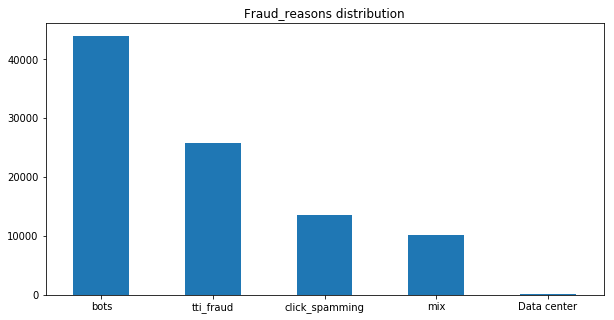

In [8]:
plot_distributions(labels, 'Fraud_reasons')

### Almost all are android app installs

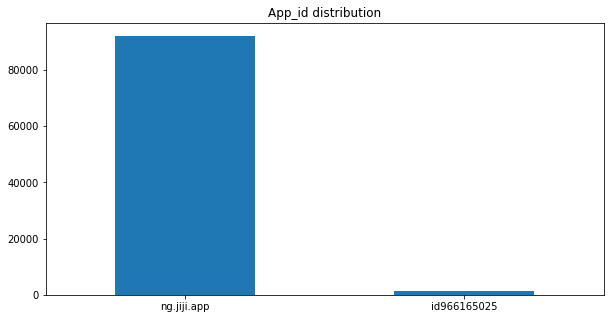

In [9]:
plot_distributions(labels, 'App_id')

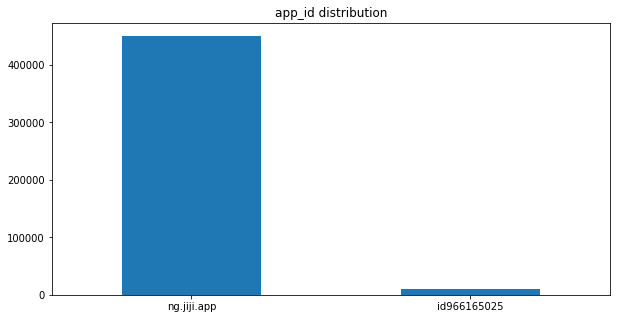

In [10]:
plot_distributions(data, 'app_id')

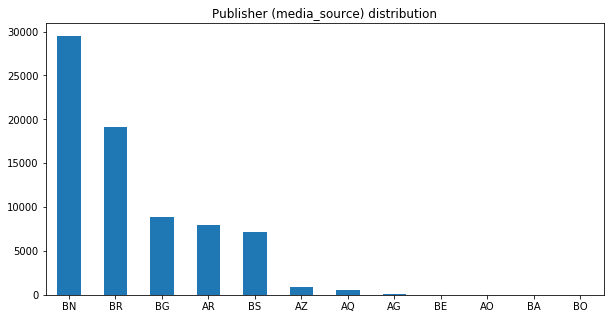

In [11]:
plot_distributions(labels, 'Publisher (media_source)')

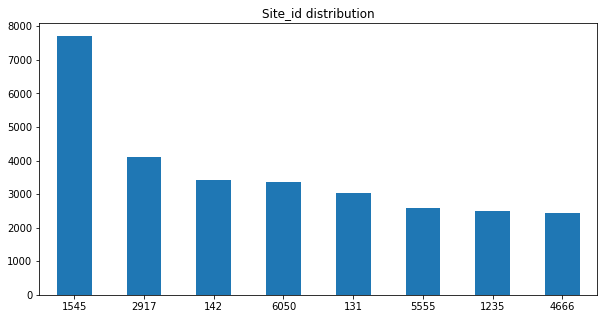

In [12]:
plot_distributions(labels, 'Site_id', 2000)

### The vast majority of installs are not via wifi

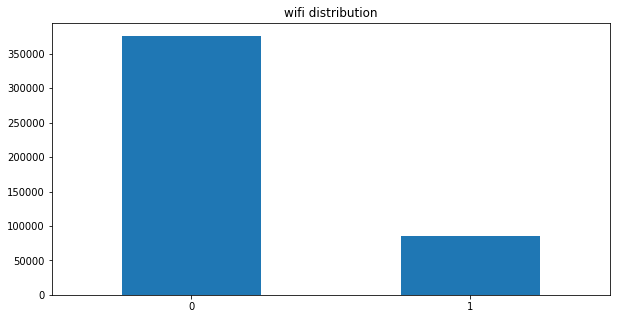

In [13]:
plot_distributions(data, 'wifi')

### If the install is via wifi it is just 25% less likely that it is a fraud

,is_fraud
wifi,
0,0.178389
1,0.747138


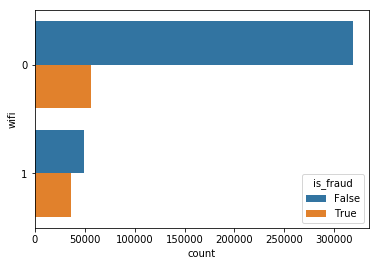

In [14]:
ax = sns.countplot(y='wifi', hue='is_fraud', data=data)
data.groupby('wifi').agg({'is_fraud': lambda x: x.sum()/(~x).sum()})

### There are some app versions that have 50% percent fraud installs

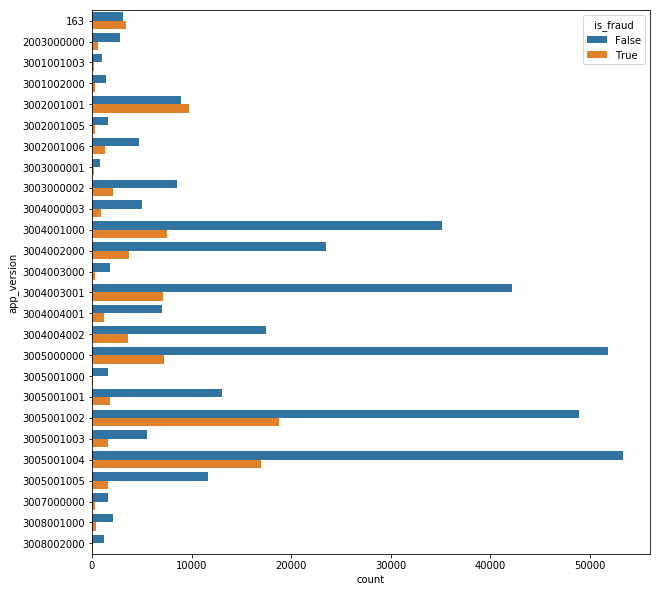

In [15]:
app_version_value_counts = data['app_version'].value_counts()
plt.figure(figsize=(10,10))
ax = sns.countplot(y='app_version', hue='is_fraud', data=data[
    data['app_version'].isin(app_version_value_counts[app_version_value_counts > 1000].index.values)])

### All frauds are have attributed_touch_type = click

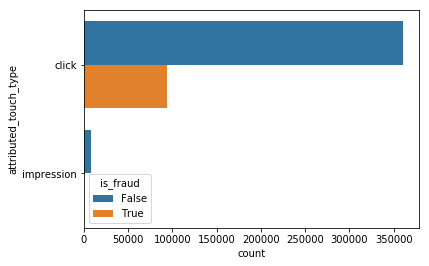

In [16]:
ax = sns.countplot(y='attributed_touch_type', hue='is_fraud', data=data)

### There is no really fraud operators

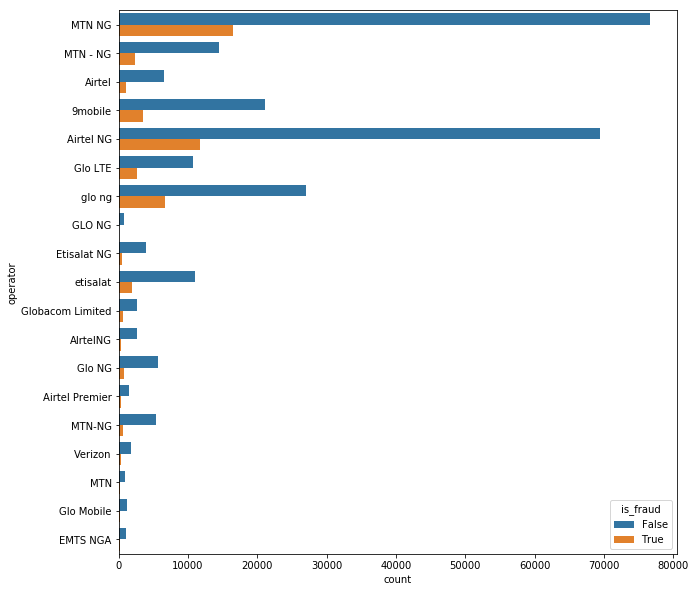

In [21]:
plot_countplot_per_is_fraud(data, 'operator', min_limit=500)

### There are languages that  are used only in fraud

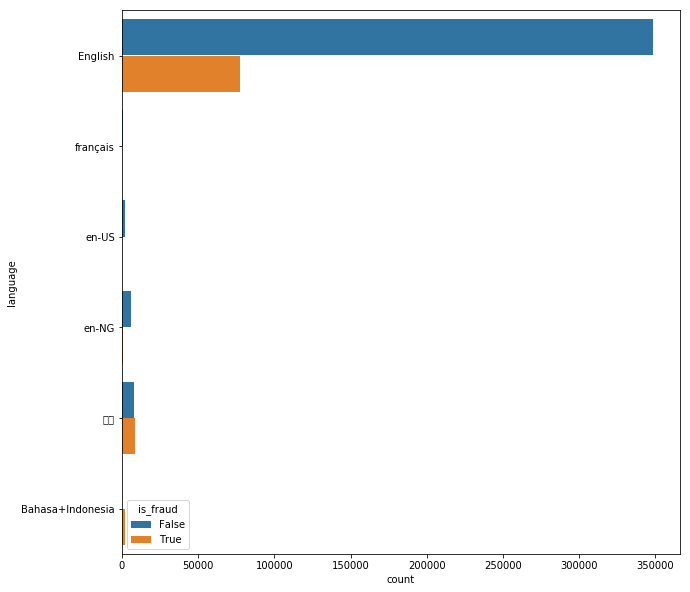

In [25]:
plot_countplot_per_is_fraud(data, 'language', min_limit=1000)

### Sdk version distribution

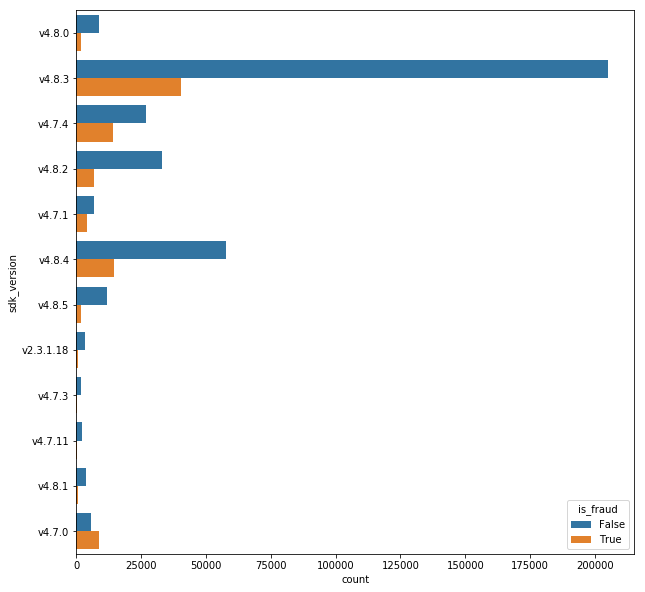

In [27]:
plot_countplot_per_is_fraud(data, 'sdk_version', min_limit=1000)

### OS version distribution

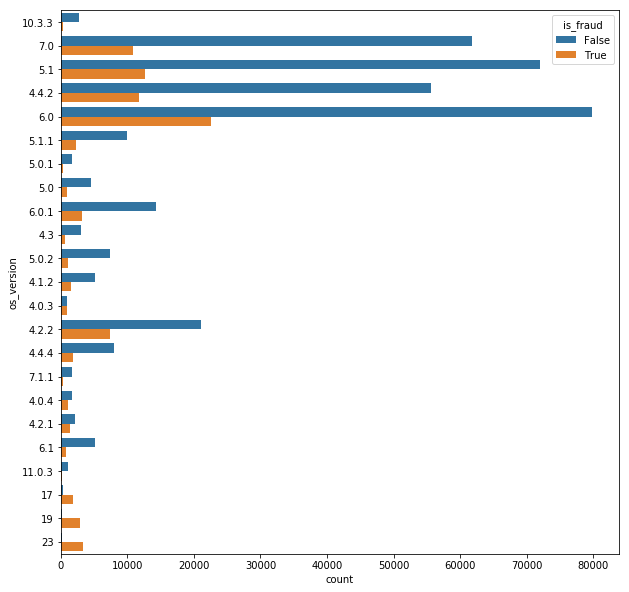

In [57]:
plot_countplot_per_is_fraud(data, 'os_version', min_limit=1000)

### All the traffic actually comes from NG

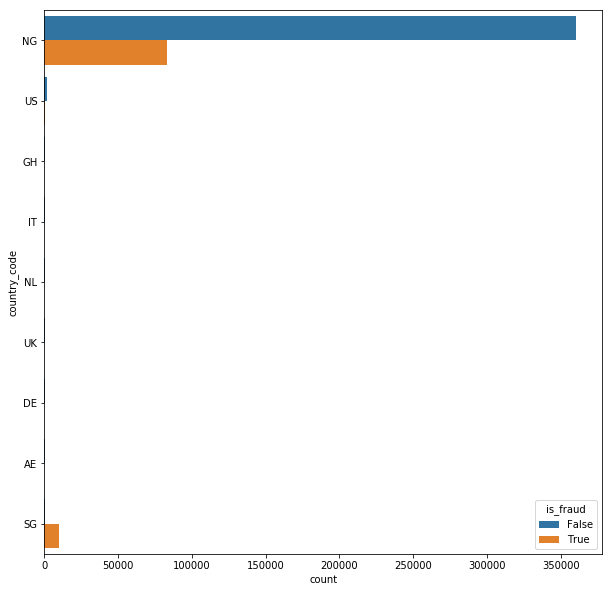

In [61]:
plot_countplot_per_is_fraud(data, 'country_code', min_limit=200) 

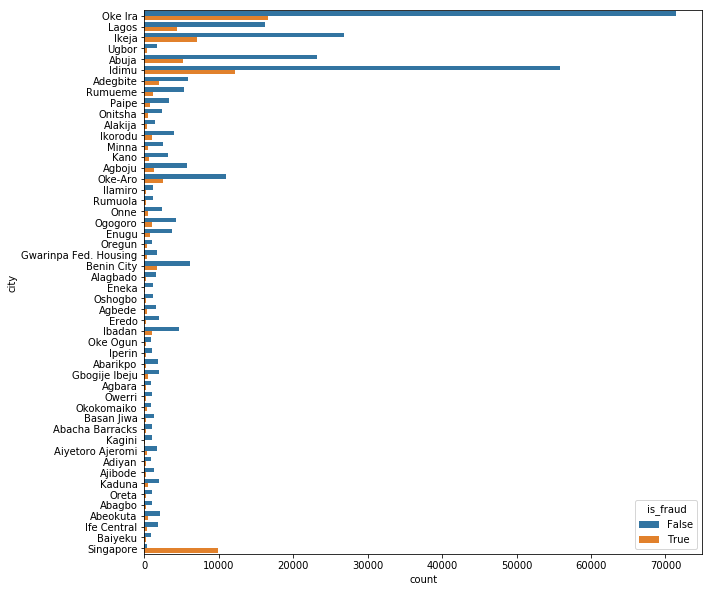

In [63]:
plot_countplot_per_is_fraud(data, 'city', min_limit=1000) 

### Publisher distribution

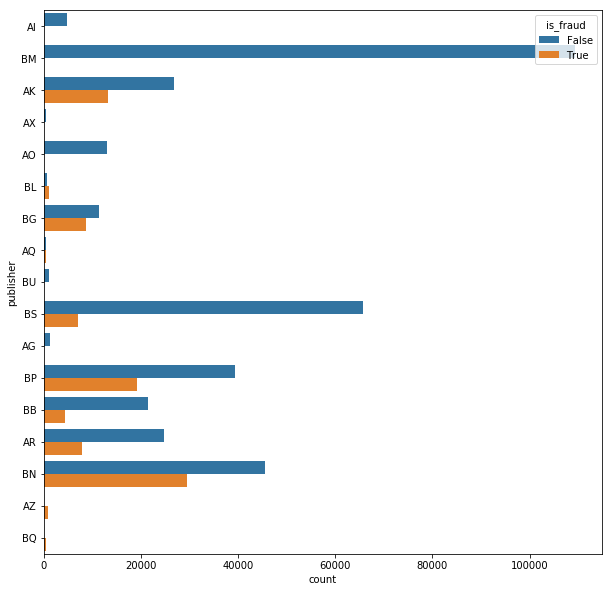

In [65]:
plot_countplot_per_is_fraud(data, 'publisher', min_limit=500) 

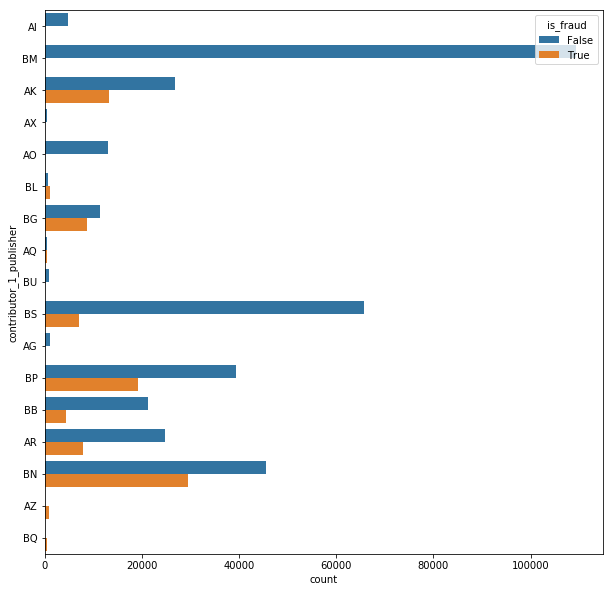

In [67]:
plot_countplot_per_is_fraud(data, 'contributor_1_publisher', min_limit=500)

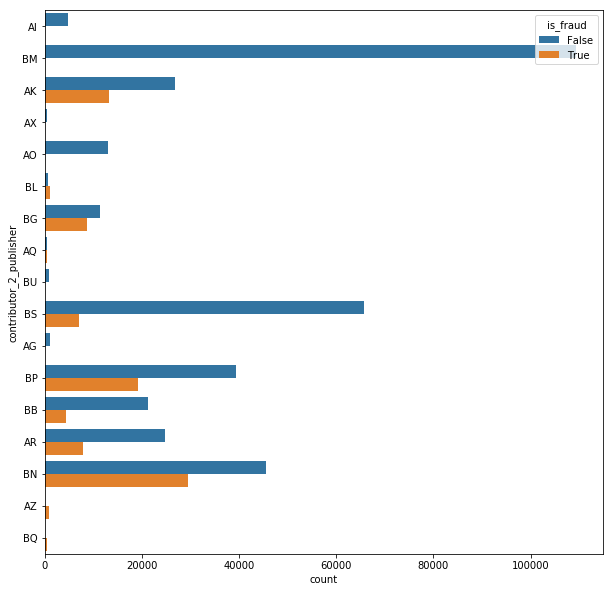

In [68]:
plot_countplot_per_is_fraud(data, 'contributor_2_publisher', min_limit=500)

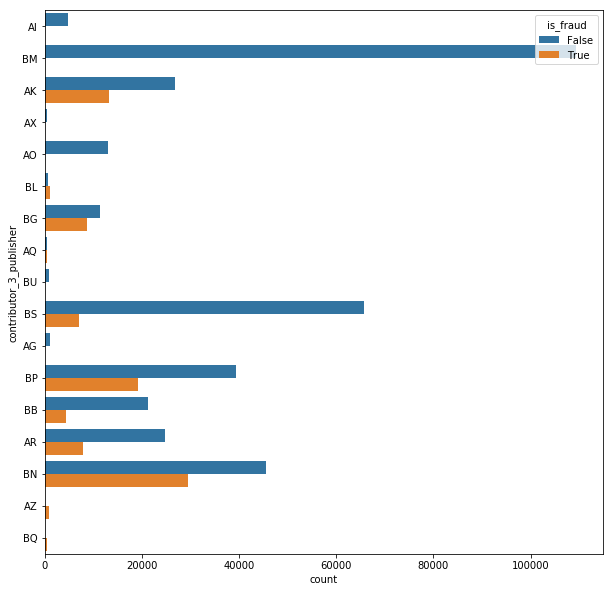

In [69]:
plot_countplot_per_is_fraud(data, 'contributor_3_publisher', min_limit=500)

### Distributions of sec_touch_install

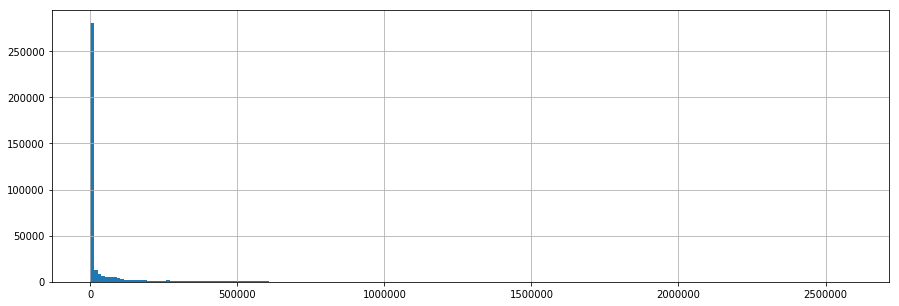

In [102]:
plt.figure(figsize=(15,5))
data[(~data['is_fraud']) & (data['sec_touch_install'])]['sec_touch_install'].hist(bins=200)

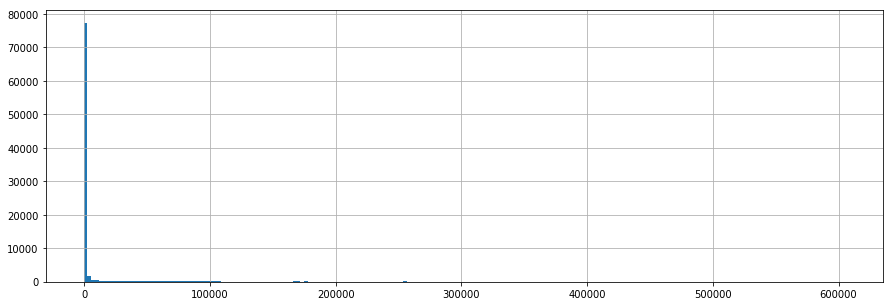

In [103]:
plt.figure(figsize=(15,5))
data[(data['is_fraud']) & (data['sec_touch_install'])]['sec_touch_install'].hist(bins=200)

(0, 200)

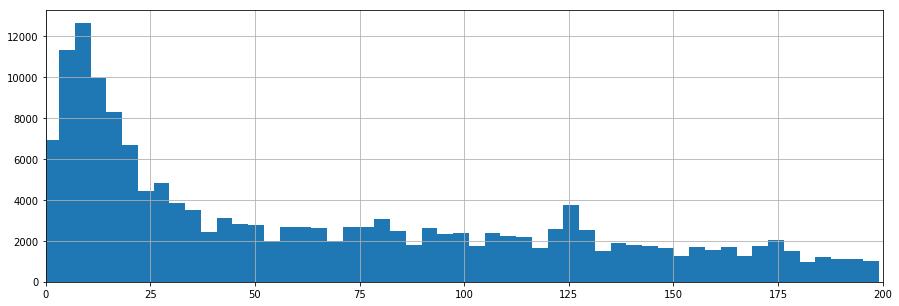

In [99]:
plt.figure(figsize=(15,5))
data[(~data['is_fraud']) & (data['sec_touch_install'] < 200)]['sec_touch_install'].hist(bins=200)
plt.xlim(0, 200)

(0, 200)

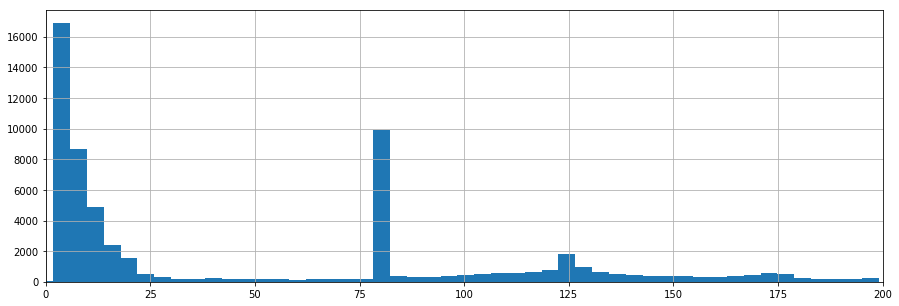

In [100]:
plt.figure(figsize=(15,5))
data[(data['is_fraud']) & (data['sec_touch_install']<200)]['sec_touch_install'].hist(bins=200)
plt.xlim(0, 200)

(0, 60)

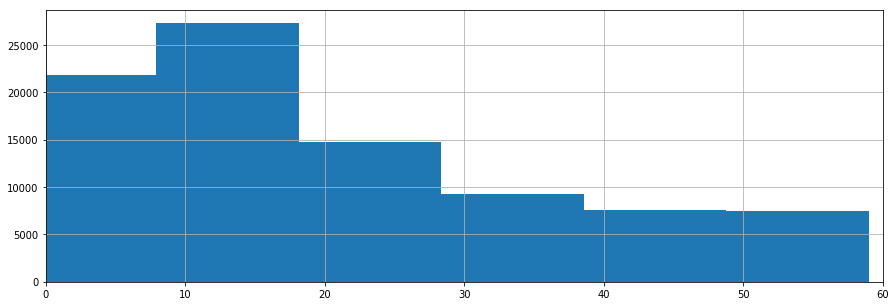

In [111]:
plt.figure(figsize=(15,5))
data[(~data['is_fraud']) & (data['sec_touch_install'] < 60)]['sec_touch_install'].hist(bins=60)
plt.xlim(0, 60)

(0, 60)

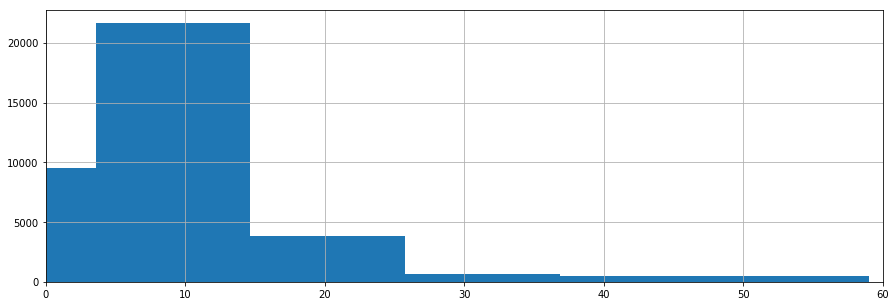

In [112]:
plt.figure(figsize=(15,5))
data[(data['is_fraud']) & (data['sec_touch_install'] < 60)]['sec_touch_install'].hist(bins=60)
plt.xlim(0, 60)

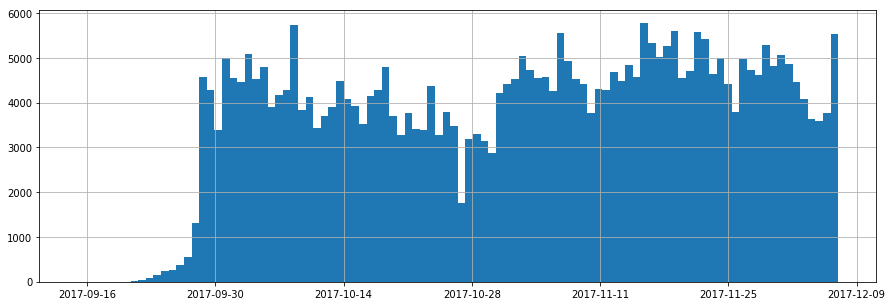

In [116]:
plt.figure(figsize=(15,5))
data[~data['is_fraud']]['attributed_touch_time'].hist(bins=100)

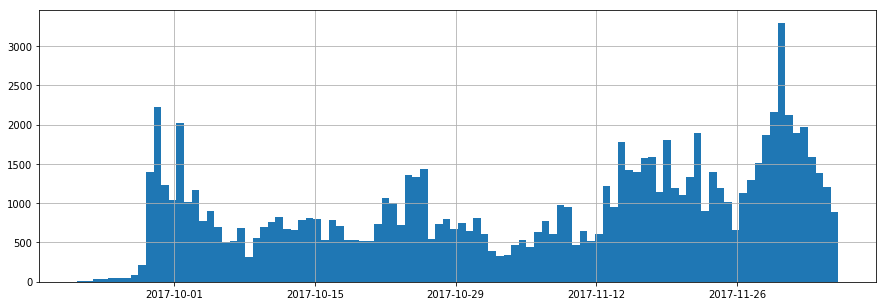

In [117]:
plt.figure(figsize=(15,5))
data[data['is_fraud']]['attributed_touch_time'].hist(bins=100)

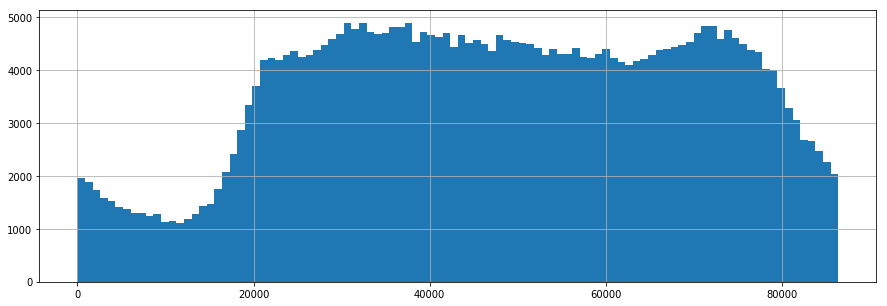

In [134]:
plt.figure(figsize=(15,5))
data[~data['is_fraud']]['install_time_since_midnight_sec'].hist(bins=100)

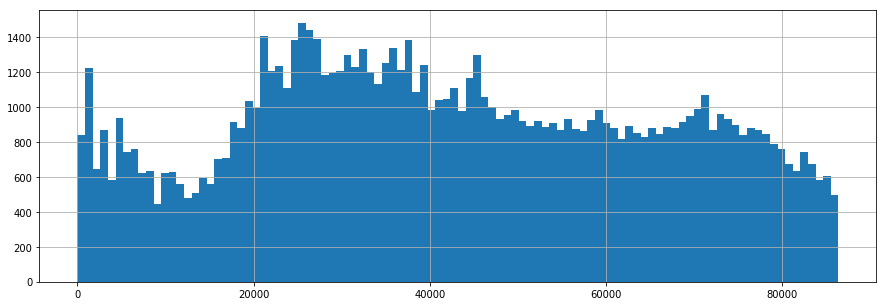

In [135]:
plt.figure(figsize=(15,5))
data[data['is_fraud']]['install_time_since_midnight_sec'].hist(bins=100)